In [ ]:
import pandas as pd
import numpy as np
import os
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [57]:
features = []
labels = []
inp = os.listdir('input')

In [58]:
for food in inp:
    food_dir = os.listdir(f"input/{food}")
    for image in food_dir:
        p_image = Image.open(f'input/{food}/{image}')
        p_image = p_image.resize((224, 224))
        p_image = np.array(p_image)
        p_image = p_image.flatten()
        features.append(p_image)
        labels.append(food)

features = np.array(features)
labels = np.array(labels)
labels

array(['chicken_tikka', 'chicken_tikka', 'chicken_tikka', 'chicken_tikka',
       'chicken_tikka', 'chicken_tikka', 'chicken_tikka', 'chicken_tikka',
       'chicken_tikka', 'chicken_tikka', 'chicken_tikka', 'chicken_tikka',
       'chicken_tikka', 'chicken_tikka', 'chicken_tikka', 'chicken_tikka',
       'chicken_tikka', 'chicken_tikka', 'chicken_tikka', 'chicken_tikka',
       'chicken_tikka', 'chicken_tikka', 'chicken_tikka', 'chicken_tikka',
       'chicken_tikka', 'chicken_tikka', 'chicken_tikka', 'chicken_tikka',
       'chicken_tikka', 'chicken_tikka', 'chicken_tikka', 'chicken_tikka',
       'chicken_tikka', 'chicken_tikka', 'chicken_tikka', 'chicken_tikka',
       'chicken_tikka', 'chicken_tikka', 'chicken_tikka', 'chicken_tikka',
       'chicken_tikka', 'chicken_tikka', 'chicken_tikka', 'chicken_tikka',
       'chicken_tikka', 'chicken_tikka', 'chicken_tikka', 'chicken_tikka',
       'chicken_tikka', 'chicken_tikka', 'aloo_gobi', 'aloo_gobi',
       'aloo_gobi', 'aloo_gobi', 

In [59]:
lb = LabelBinarizer()
lb.fit(labels)
y_bin = lb.transform(labels)
scaler = StandardScaler()
X_scaler = scaler.fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(X_scaler, labels, test_size=0.2)

In [60]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_test

array(['aloo_gobi', 'biryani', 'chicken_tikka', 'chicken_tikka',
       'biryani', 'aloo_gobi', 'biryani', 'chicken_tikka',
       'chicken_tikka', 'aloo_gobi', 'aloo_gobi', 'aloo_gobi',
       'aloo_gobi', 'biryani', 'chicken_tikka', 'biryani', 'biryani',
       'chicken_tikka', 'aloo_gobi', 'aloo_gobi', 'chicken_tikka',
       'biryani', 'biryani', 'biryani', 'aloo_gobi', 'biryani',
       'chicken_tikka', 'chicken_tikka', 'chicken_tikka', 'chicken_tikka'],
      dtype='<U13')

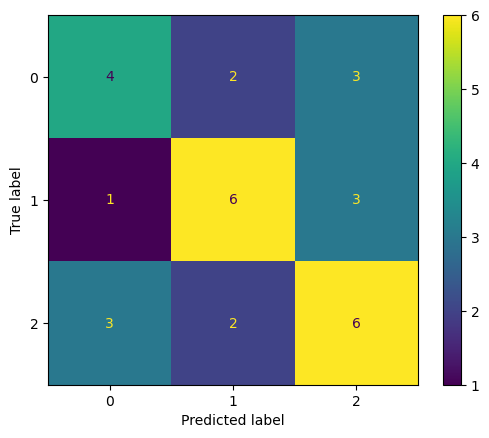

In [61]:
p = model.predict(X_test)
cm = confusion_matrix(y_test, p)

cm_display = ConfusionMatrixDisplay(cm).plot()